<a href="https://colab.research.google.com/github/NadellaTarun/AI_Resume-analyser/blob/main/project_sign_language_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Re-upload the ZIP file


In [ ]:
import zipfile
import os

# Extract the uploaded ZIP file
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content/dataset')  # Extract to this folder
        os.remove(filename)  # Remove ZIP file after extraction


In [ ]:
!pip install gtts


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
dataset_path = '/content/dataset/'  # Update path based on dataset location
train_dir = os.path.join(dataset_path, 'Train')

# Define image parameters
IMG_SIZE = 64
BATCH_SIZE = 32

# Data Augmentation and Splitting
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,248 (6.21 MB)

 Trainable params: 1,628,248 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
epochs = 10
model.fit(train_data, validation_data=val_data, epochs=epochs)

# Save model in recommended format
model.save("sign_language_model.keras")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


687/687 ━━━━━━━━━━━━━━━━━━━━ 142s 201ms/step - accuracy: 0.4024 - loss: 2.0094 - val_accuracy: 0.9808 - val_loss: 0.1106
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 118s 172ms/step - accuracy: 0.9104 - loss: 0.2667 - val_accuracy: 0.9987 - val_loss: 0.0150
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 118s 172ms/step - accuracy: 0.9497 - loss: 0.1466 - val_accuracy: 0.9987 - val_loss: 0.0079
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 118s 172ms/step - accuracy: 0.9660 - loss: 0.1009 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 118s 172ms/step - accuracy: 0.9690 - loss: 0.0936 - val_accuracy: 0.9998 - val_loss: 0.0016
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 119s 173ms/step - accuracy: 0.9743 - loss: 0.0726 - val_accuracy: 0.9995 - val_loss: 0.0019
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 118s 172ms/step - accuracy: 0.9769 - loss: 0.0693 - val_accuracy: 1.0000 - val_loss: 5.2092e-04
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 118s 172ms/step - accuracy: 0.9807 - loss: 

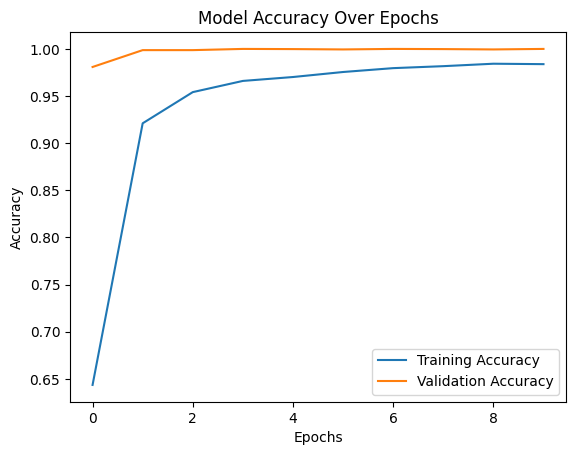

In [ ]:
import matplotlib.pyplot as plt

# Get training history
history_dict = model.history.history

# Plot accuracy
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()


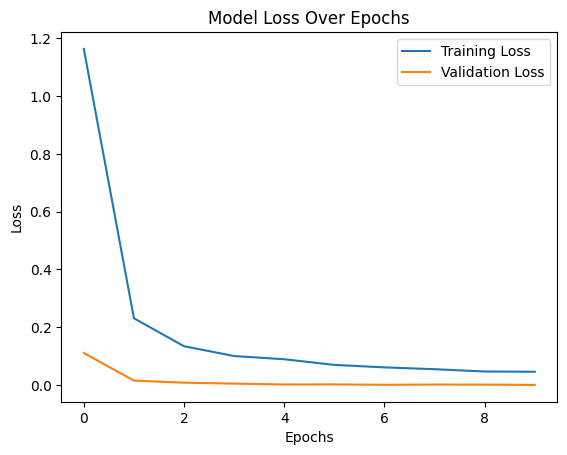

In [ ]:
# Plot loss
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
_, accuracy_before = model.evaluate(val_data)
print(f"Accuracy before fine-tuning: {accuracy_before}")

172/172 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 1.0000 - loss: 6.1242e-05
Accuracy before fine-tuning: 1.0


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define image parameters
IMG_SIZE = 64

# Function to build and tune the CNN model
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
                     activation='relu',
                     input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=32),
                     kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=32),
                    activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(24, activation='softmax'))  # Assuming 24 classes (A-Z excluding J and Z)

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
import keras_tuner as kt

# Define Hyperparameter Tuning
tuner = kt.RandomSearch(
    build_model,  # Function to build the CNN model
    objective='val_accuracy',  # Optimize for highest validation accuracy
    max_trials=3,  # Reduced from 10 → Faster tuning
    executions_per_trial=1,  # Run each trial once
    directory='hyperparameter_tuning',
    project_name='cnn_sign_language_tuning'
)


In [ ]:
# Early stopping to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
print(dir())  # Lists all defined variables


['BATCH_SIZE', 'Conv2D', 'Dense', 'Dropout', 'Flatten', 'IMG_SIZE', 'ImageDataGenerator', 'In', 'MaxPooling2D', 'Out', 'Sequential', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'accuracy_before', 'build_model', 'datagen', 'dataset_path', 'epochs', 'exit', 'filename', 'files', 'get_ipython', 'history_dict', 'kt', 'model', 'np', 'os', 'plt', 'quit', 'stop_early', 'tf', 'train_data', 'train_dir', 'tuner', 'uploaded', 'val_data', 'zip_ref', 'zipfile']


In [ ]:
import tensorflow as tf

# Define Early Stopping
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Stop if validation accuracy does not improve
    patience=3,  # Wait 3 epochs before stopping
    mode='max'  # Maximizing validation accuracy
)


In [ ]:
tuner.search(
    train_data,
    epochs=5,  # Train for max 5 epochs
    validation_data=val_data,
    callbacks=[stop_early]  # Stop if accuracy doesn't improve
)


Trial 3 Complete [00h 41m 09s]
val_accuracy: 0.047071702778339386

Best val_accuracy So Far: 0.9186279773712158
Total elapsed time: 01h 58m 33s


In [ ]:

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(train_data, epochs=8, validation_data=val_data)

Epoch 1/8
687/687 ━━━━━━━━━━━━━━━━━━━━ 511s 741ms/step - accuracy: 0.0689 - loss: 3.1182 - val_accuracy: 0.3640 - val_loss: 2.4168
Epoch 2/8
687/687 ━━━━━━━━━━━━━━━━━━━━ 508s 739ms/step - accuracy: 0.2438 - loss: 2.4490 - val_accuracy: 0.6731 - val_loss: 1.4938
Epoch 3/8
687/687 ━━━━━━━━━━━━━━━━━━━━ 492s 716ms/step - accuracy: 0.3827 - loss: 1.9184 - val_accuracy: 0.8217 - val_loss: 0.9146
Epoch 4/8
687/687 ━━━━━━━━━━━━━━━━━━━━ 496s 722ms/step - accuracy: 0.4928 - loss: 1.5415 - val_accuracy: 0.8958 - val_loss: 0.6349
Epoch 5/8
687/687 ━━━━━━━━━━━━━━━━━━━━ 494s 720ms/step - accuracy: 0.5551 - loss: 1.3278 - val_accuracy: 0.9480 - val_loss: 0.4404
Epoch 6/8
687/687 ━━━━━━━━━━━━━━━━━━━━ 495s 720ms/step - accuracy: 0.6144 - loss: 1.1423 - val_accuracy: 0.9670 - val_loss: 0.3136
Epoch 7/8
687/687 ━━━━━━━━━━━━━━━━━━━━ 495s 720ms/step - accuracy: 0.6381 - loss: 1.0356 - val_accuracy: 0.9743 - val_loss: 0.2336
Epoch 8/8
687/687 ━━━━━━━━━━━━━━━━━━━━ 499s 716ms/step - accuracy: 0.6695 - loss: 0

In [ ]:
# Evaluate model performance after fine-tuning
loss_after, accuracy_after = best_model.evaluate(val_data)
print(f"Model Evaluation - Loss: {loss_after:.4f}, Accuracy: {accuracy_after:.4%}")


172/172 ━━━━━━━━━━━━━━━━━━━━ 31s 178ms/step - accuracy: 0.9822 - loss: 0.1582
Model Evaluation - Loss: 0.1602, Accuracy: 98.2302%


In [ ]:

import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Function to test the model on a new image
def test_model(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = best_model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]
    print(f"Predicted Class: {class_label}")
    return class_label

In [ ]:
# Function to evaluate the model with confusion matrix and classification report
def evaluate_model():
    y_true = test_data.classes  # Actual labels
    y_pred = np.argmax(best_model.predict(test_data), axis=1)  # Predicted labels

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=test_data.class_indices.keys(),
                yticklabels=test_data.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))

In [ ]:
from PIL import Image


In [ ]:

import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Function to test the model on a new image
def test_model(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = best_model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]
    print(f"Predicted Class: {class_label}")
    return class_label

In [ ]:
from PIL import Image  # ✅ Fix: Import the missing module

def predict_sign_language():
    for img_name in uploaded.keys():
        img_path = img_name
        img = Image.open(img_path).convert('RGB')  # ✅ Now Image is recognized
        img = img.resize((IMG_SIZE, IMG_SIZE))
        img_array = np.array(img) / 255.0


In [ ]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image  # Fix: Import Image module
from gtts import gTTS  # Fix: Import gTTS for text-to-speech
import IPython.display as ipd  # Fix: Import for playing audio in Colab
from google.colab import files  # Import for file upload

# Define Image Size
IMG_SIZE = 64

# Load Pretrained Model (Ensure 'model' is already loaded)
# model = tf.keras.models.load_model('your_model_path.h5')  # Uncomment if needed

# Load Dataset to Get Class Indices
dataset_path = "/content/dataset/"  # Adjust path accordingly
train_dir = os.path.join(dataset_path, "Train")

datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Function to Predict Multiple Images
def predict_sign_language():
    uploaded = files.upload()
    if not uploaded:
        print("No files uploaded. Please upload an image.")
        return

    predictions = {}

    for img_name in uploaded.keys():
        try:
            img_path = img_name
            img = Image.open(img_path).convert("RGB")
            img = img.resize((IMG_SIZE, IMG_SIZE))
            img_array = np.array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            prediction = model.predict(img_array)
            class_idx = np.argmax(prediction)
            class_label = list(train_data.class_indices.keys())[class_idx]

            print(f"Predicted Letter for {img_name}: {class_label}")
            predictions[img_name] = class_label

        except Exception as e:
            print(f"Error processing {img_name}: {str(e)}")

    # Convert all predictions to speech
    if predictions:
        text_output = ", ".join(predictions.values())
        tts = gTTS(text=text_output, lang="en")
        tts.save("output.mp3")
        return ipd.Audio("output.mp3")
    else:
        print("No valid images processed.")

# Run Prediction
predict_sign_language()


Found 21974 images belonging to 24 classes.


Saving 960_L - Copy.jpg to 960_L - Copy.jpg
Saving 960_L.jpg to 960_L.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Letter for 960_L - Copy.jpg: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Letter for 960_L.jpg: L


In [ ]:
predict_sign_language()


In [ ]:
!pip install streamlit


In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
pip install pyttsx3

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import base64
from gtts import gTTS
from io import BytesIO
import tempfile

MODEL_PATH = "sign_language_model.keras"
if not os.path.exists(MODEL_PATH):
    st.error(f"Model file `{MODEL_PATH}` not found! Please upload the model.")
else:
    model = tf.keras.models.load_model(MODEL_PATH)

CLASS_LABELS = list("ABCDEFGHIKLMNOPQRSTUVWXY")

st.set_page_config(page_title="🤟 Sign Language Recognition", layout="wide")

# Background image
background_image = "signbg.jpg"
if os.path.exists(background_image):
    with open(background_image, "rb") as f:
        bg_encoded = base64.b64encode(f.read()).decode()
    st.markdown(
        f"""
        <style>
        .stApp {{
            background-image: url("data:image/jpg;base64,{bg_encoded}");
            background-size: cover;
            background-position: center;
        }}
        </style>
        """,
        unsafe_allow_html=True
    )
else:
    st.warning("⚠️ Background image 'signbg.jpg' not found.")

st.title("🤟 Sign Language Recognition")

uploaded_files = st.file_uploader("Upload Hand Gesture Images", type=["jpg", "jpeg", "png"], accept_multiple_files=True)

def predict_sign(image):
    img = image.resize((64, 64))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = CLASS_LABELS[np.argmax(prediction)]
    return predicted_class

# Speak using gTTS
def speak(text):
    tts = gTTS(text=text, lang='en')
    with tempfile.NamedTemporaryFile(delete=False, suffix=".mp3") as fp:
        tts.save(fp.name)
        st.audio(fp.name, format='audio/mp3')

# Predictions
if uploaded_files:
    st.subheader("📸 Predictions:")
    for uploaded_file in uploaded_files:
        image = Image.open(uploaded_file).convert("RGB")
        label = predict_sign(image)
        st.image(image, caption=f"Prediction: {label}", use_container_width=True)
        st.success(f"✅ Predicted Sign: **{label}**")
        speak(f"The predicted sign is {label}")





In [ ]:
!streamlit run app.py &>/content/log.txt &



In [ ]:
!pkill -f ngrok


In [ ]:
!streamlit run app.py &>/content/log.txt &


In [ ]:
from pyngrok import ngrok

# Kill any existing tunnel (extra safety)
ngrok.kill()

# Start new tunnel
public_url = ngrok.connect("http://localhost:8501")
print("🔗 Public URL:", public_url)
